In [ ]:
# ! pip install tensorflow
# ! pip install xgboost
# ! pip install lightgbm


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [2]:
tourlist=pd.read_excel('dataset_clean.xlsx')
tourlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205381 entries, 0 to 205380
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   관광지명       205381 non-null  object        
 1   검색건수       205381 non-null  int64         
 2   area_code  205381 non-null  int64         
 3   date       205381 non-null  object        
 4   avgTemp    205381 non-null  float64       
 5   highTemp   205381 non-null  float64       
 6   lowTemp    205381 non-null  float64       
 7   weather    205381 non-null  int64         
 8   rainProb   205381 non-null  int64         
 9   datetime   205381 non-null  datetime64[ns]
 10  month      205381 non-null  object        
 11  weekday    205381 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 18.8+ MB


In [3]:
# 정규화
from sklearn.preprocessing import MinMaxScaler
tourlist4sc = tourlist[['avgTemp','highTemp','lowTemp','rainProb']]
scaler = MinMaxScaler()
scaler.fit(tourlist4sc)
tourlist_sc = scaler.transform(tourlist4sc)
tourlist_sc = pd.DataFrame(tourlist_sc, columns=['avgTemp','highTemp','lowTemp','rainProb'])

In [4]:
#범주형 데이터 원핫인코딩
from sklearn.preprocessing import LabelEncoder
tourlist_oh = pd.get_dummies(tourlist['관광지명'])
weather_oh = pd.get_dummies(tourlist['weather'])
# 에러
# month_oh = pd.get_dummies(tourlist['month'])
# weekday_oh = pd.get_dummies(tourlist['weekday'])

In [5]:
# 관광지명, 날씨, 평균온도, 최고온도, 최저온도, 강수확률
train = pd.concat([tourlist_oh, weather_oh, tourlist_sc], axis=1)
target = tourlist['검색건수']
train_input,test_input,train_target,test_target = train_test_split(
    train,target, test_size = 0.3)

In [11]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
scores = cross_validate(model, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

In [ ]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(tree_method = 'hist')
scores = cross_validate(model, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

In [7]:
from xgboost import LGBMRegressor
model = LGBMRegressor(tree_method = 'hist')
scores = cross_validate(model, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

nan nan


C:\Users\human\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\human\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\human\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py", line 895, in fit
    super().fit(X, y, sample_weight=sample_weight, init_score=init_score,
  File "C:\Users\human\AppData\Local\Programs\Python\Python

In [10]:
from xgboost import XGBRegressor
model = XGBRegressor(tree_method = 'hist')
scores = cross_validate(model, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.90413940918306 0.8637943079157292


In [21]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(train)
train_pca = pca.transform(train)
train_input,test_input,train_target,test_target = train_test_split(
    train_pca,target, test_size = 0.3)

C:\Users\human\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\human\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [24]:
print(pca.n_components_)

440


In [19]:
from xgboost import XGBRegressor
model = XGBRegressor(tree_method = 'hist')
scores = cross_validate(model, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.900104672193659 0.8620108802947227


In [26]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :', d)

선택할 차원 수 : 440


In [25]:
print(pca.explained_variance_ratio_)

[0.18507131 0.12311585 0.07833453 0.05983025 0.02457563 0.01143753
 0.00213322 0.00213013 0.00211833 0.00197079 0.00172674 0.00124505
 0.00111979 0.0010697  0.00106776 0.00106724 0.00106724 0.00106724
 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724
 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724
 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724
 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724
 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724
 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724
 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724
 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724
 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724
 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724
 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724
 0.00106724 0.00106724 0.00106724 0.00106724 0.00106724 0.0010

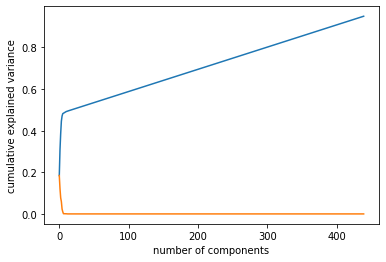

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.plot(pca.explained_variance_ratio_)
plt.show()

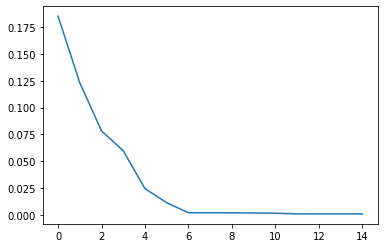

In [20]:
# pca주성분갯수
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)
plt.show()

In [36]:
# pca>> n_components


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
train = pd.concat([tourlist_oh, weather_oh, tourlist_sc], axis=1)
target = tourlist['검색건수']
train_score = []
test_score = []

# for i in range(10,21):
pca = PCA(n_components=17)
pca.fit(train)
train = pca.transform(train)
train_input,test_input,train_target,test_target = train_test_split(
train,target, test_size = 0.3)
model = XGBRegressor(tree_method = 'hist')
model.fit(train_input,train_target)
train_score.append(model.score(train_input, train_target))
test_score.append(model.score(test_input, test_target))


C:\Users\human\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\human\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [37]:
print(train_score)
print(test_score)

[0.9045561128000625]
[0.8704546517028151]


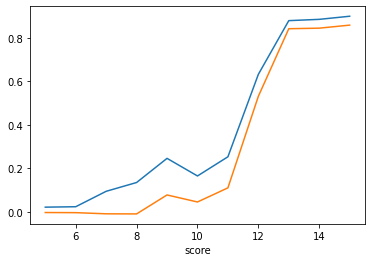

In [23]:
plt.plot(range(5,16), train_score)
plt.plot(range(5,16), test_score)
plt.xlabel('n_component')
plt.xlabel('score')
plt.show()

In [14]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
scores = cross_validate(model, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

nan nan


In [6]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=1)



In [7]:
model.fit(train_input,train_target)

C:\Users\human\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
scores = cross_validate(model, train_input, train_target, return_train_score=True, n_jobs=-1)

In [ ]:
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

In [12]:
model.fit(train_input,train_target)
print(model.feature_importances_)
# 관광지명, 날씨, 평균온도, 최고온도, 최저온도

[0.83896296 0.01384674 0.04878284 0.05447892 0.04392854]


In [21]:
# model = RandomForestRegressor(oob_score=True, n_jobs=-1)
model.fit(train_input, train_target)
model.predict(test_input)
# print(model.oob_score_)

0.8725927599512489


In [13]:
import joblib

joblib.dump(model, 'random_20220504_2_정규화.pkl')

['random_20220504_2_정규화.pkl']

In [8]:
train = pd.concat([tourlist[['관광지명','weather']],tourlist_sc[['avgTemp','highTemp','lowTemp']]], axis=1)
target = tourlist_sc['검색건수']
train_input,test_input,train_target,test_target = train_test_split(
    train,target, test_size = 0.3)

In [72]:
from sklearn.ensemble import RandomForestRegressor
# n_estimators 트리개수 많을수록 과적합방지
# max_depth 최대 깊이 적을수록 과적합방지
# min_samples_split 분리노드의 최소 자료수 많을수록 과적합방지
# n_split 많을수록 과적합방지에 유리


model = RandomForestRegressor(n_jobs=-1, n_estimators = 100, max_depth= 15, min_impurity_decrease=0.0000001 ,random_state=1)
# model = RandomForestRegressor(n_jobs=-1, n_estimators = 100, max_depth= 20, min_samples_split=4, random_state=1)
scores = cross_validate(model, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.8582485243276693 0.826327509019239


In [73]:
model.fit(train_input,train_target)
print(model.feature_importances_)

[0.91846301 0.00636518 0.02595564 0.03342244 0.01579374]


In [37]:
import joblib

joblib.dump(model, 'random_20220502_4 .pkl')
# '관광지명','weather','avgTemp','highTemp','lowTemp'
# [0.89011888 0.00943918 0.0337521  0.04151988 0.02516996]

# 0.9289117504414467 0.8658064102438724
# [0.88384773 0.01008433 0.03513746 0.04330149 0.02762899]
# (n_jobs=-1, n_estimators = 95, max_depth= 18, random_state=1)

['random_20220502_4 .pkl']

In [74]:
from sklearn.ensemble import RandomForestRegressor
result = []
for n_estimators in [80,85,90,95,100,105,110,120]:
        for max_depth in [10,11,12,13,14,15,16,17,18,19,20]:
                for min_impurity_decrease in [0.0000001,0.0000002,0.0000003,0.0000004,0.0000005,0.0000006,0.0000007,0.0000008,0.0000009,0.000001]:
                        for min_samples_leaf in [1,3,5]:
                                model = RandomForestRegressor(n_jobs=-1, n_estimators = n_estimators, max_depth= max_depth, min_impurity_decrease=min_impurity_decrease, random_state=1)
                                scores = cross_validate(model, train_input, train_target, return_train_score=True, n_jobs=-1)
                                train_score = np.mean(scores['train_score'])
                                test_score = np.mean(scores['test_score'])
                                model.fit(train_input,train_target)
                                imp = model.feature_importances_
                                result.append(
                                        train_score,
                                        test_score,
                                        imp
                                )



In [ ]:
#모델링 불러오기
import joblib
model = joblib.load('random_20220501_2.pkl')

df['']


def sort_jongro_month(price, rentPrice, condition1, condition2, condition3):
    df_filter = df_jongro_month.loc[(df_jongro_month['보증금']<=int(price)) & (df_jongro_month['임대료']<=int(rentPrice))] #보증금, 임대료 필터링   
    df_filter['score'] = df_filter[condition1+'_sc']*1.4+df_filter[condition2+'_sc']*1.2+df_filter[condition3+'_sc'] #선호환경 가중치
    df_dscending = df_filter.sort_values(by=['score'], ascending=False)[:15] 
    input_data = df_dscending[['임대면적','보증금','위도','경도','문화생활','판매시설','음식점']]
    df_dscending['예측값'] = model_jongro_month.predict(input_data)
    return df_dscending